In [21]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

'CGCGCGAATATCTCGACAGCACCTTGGCCTCCCACTGGAGGTCCATAGCA'

In [28]:
df = pd.read_csv('final file hopefully no errors.csv')
df['Len'] = [len(s) for s in df['Seq'].to_list()]

dfp = df.loc[df['Gen'] == 'ssRNA(+)']
dfn = df.loc[df['Gen'] == 'ssRNA(-)']

wdfp = dfp.sample(len(dfn))

wdfp = wdfp.reset_index(drop = True)
dfp = dfp.reset_index(drop = True)
dfn = dfn.reset_index(drop = True)

In [4]:
#taking all ATGC permutations for windows of length 7

import itertools

winlist7 = []

for i in range(7,8):

    for i in (itertools.product('ATGC', repeat=i)):
        winlist7.append(''.join(i))

In [7]:
#load databases as dataframes

#set fragment/window size

window_sizes = list(range(7,8))

#set count threshold
###

#set other parameters
match_award      = 2
mismatch_penalty = -1
gap_penalty      = -1 # both for opening and extanding

#complete workflow

for win in window_sizes:
    winlist = [w for w in winlist7 if len(w) == win]
    
    #taking all unique elements into winlist
    
#     for repseq in repseqs:
#         for i in range(0, len(repseq) - win + 1):
#             piece = repseq[i:i + win]
#             if piece not in winlist:
#                 winlist.append(piece)
                
    print('Done making %d windows' % len(winlist)) 
    
    #two dataframes to stores results
    
    resultp = pd.DataFrame(index = list(range(len(dfp))), columns = winlist)
    resultn = pd.DataFrame(index = list(range(len(dfn))), columns = winlist)
    
    c = 1
    
    for element in winlist:
        for i, r in dfp.iterrows():
            score = calculate_element_score3(match_award, mismatch_penalty, gap_penalty, element, r['Seq'])
            
            resultp.loc[i, element] = score
            
        for i, r in dfn.iterrows():
            score = calculate_element_score3(match_award, mismatch_penalty, gap_penalty, element, r['Seq'])
            
            resultn.loc[i, element] = score
            
        print('%d iterations done in winlist. %d remaining' % (c, (len(winlist) - c) ))
        
        c+=1

    resultp.to_csv('resultp window %d.csv' % win, index = False)
    resultn.to_csv('resultn window %d.csv' % win, index = False)

Done making 16384 windows


NameError: name 'calculate_element_score3' is not defined

In [13]:
def calculate_element_score3(match_award, mismatch_penalty, gap_penalty, seq1, seq2):
    m, n = len(seq1), len(seq2)  # length of two sequences

    # Generate DP table and traceback path pointer matrix
    score = np.zeros((m+1, n+1)).astype(int)      # the DP table
                                                    # to store the traceback path

    max_score = 0        # initial maximum score in DP table
    # Calculate DP table and mark pointers

    scores_list = []

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            score_diagonal = score[i-1][j-1] + match_score(seq1[i-1], seq2[j-1])
            score_up = score[i][j-1] + gap_penalty
            score_left = score[i-1][j] + gap_penalty
            score[i][j] = max(0,score_left, score_up, score_diagonal)
            if score[i][j] >= max_score:
                max_i = i
                max_j = j
                max_score = score[i][j];

    perfect_score = min(len(seq1), len(seq2)) * match_award

    perfect_matches = np.count_nonzero(score == perfect_score)

    first_tolerance_match = np.count_nonzero(score == perfect_score - 1)
    second_tolerance_match = np.count_nonzero(score == perfect_score - 2)
    third_tolerance_match = np.count_nonzero(score == perfect_score - 3)

    final_score = perfect_matches + first_tolerance_match/(perfect_score * 2) + second_tolerance_match/(perfect_score * 4) + third_tolerance_match/(perfect_score * 8)
    
    return final_score

def match_score(alpha, beta):
    if alpha == beta:
        return match_award
    elif alpha == '-' or beta == '-':
        return gap_penalty
    else:
        return mismatch_penalty

In [ ]:
#checking if scoring function scales with length

In [17]:
#set other parameters
match_award      = 2
mismatch_penalty = -1
gap_penalty      = -1 # both for opening and extanding

len_score = []

for i in range(500,60000,500):

    rs = ''.join(random.choice('ATGC') for _ in range(i))
    
    score = calculate_element_score3(match_award, mismatch_penalty, gap_penalty, 'ATGC', rs)
    
    len_score.append((len(rs), score))
    
    print('iter %d' % (i/500))


iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
iter 20
iter 21
iter 22
iter 23
iter 24
iter 25
iter 26
iter 27
iter 28
iter 29
iter 30
iter 31
iter 32
iter 33
iter 34
iter 35
iter 36
iter 37
iter 38
iter 39
iter 40
iter 41
iter 42
iter 43
iter 44
iter 45
iter 46
iter 47
iter 48
iter 49
iter 50
iter 51
iter 52
iter 53
iter 54
iter 55
iter 56
iter 57
iter 58
iter 59
iter 60
iter 61
iter 62
iter 63
iter 64
iter 65
iter 66
iter 67
iter 68
iter 69
iter 70
iter 71
iter 72
iter 73
iter 74
iter 75
iter 76
iter 77
iter 78
iter 79
iter 80
iter 81
iter 82
iter 83
iter 84
iter 85
iter 86
iter 87
iter 88
iter 89
iter 90
iter 91
iter 92
iter 93
iter 94
iter 95
iter 96
iter 97
iter 98
iter 99
iter 100
iter 101
iter 102
iter 103
iter 104
iter 105
iter 106
iter 107
iter 108
iter 109
iter 110
iter 111
iter 112
iter 113
iter 114
iter 115
iter 116
iter 117
iter 118
iter 119


In [19]:
a = np.array(len_score)

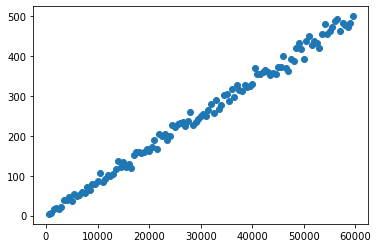

In [26]:
plt.scatter(a[:,0],a[:,1])

#score function scales linearly with length of sequence

In [35]:
#generating nonrandom sequences

supseq = ''

for s in dfp.sort_values('Len')['Seq'].to_list():
    supseq = supseq + s
    
    if len(supseq) >= 60000:
        print(len(supseq))
        break

60745


iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
iter 20
iter 21
iter 22
iter 23
iter 24
iter 25
iter 26
iter 27
iter 28
iter 29
iter 30
iter 31
iter 32
iter 33
iter 34
iter 35
iter 36
iter 37
iter 38
iter 39
iter 40
iter 41
iter 42
iter 43
iter 44
iter 45
iter 46
iter 47
iter 48
iter 49
iter 50
iter 51
iter 52
iter 53
iter 54
iter 55
iter 56
iter 57
iter 58
iter 59
iter 60
iter 61
iter 62
iter 63
iter 64
iter 65
iter 66
iter 67
iter 68
iter 69
iter 70
iter 71
iter 72
iter 73
iter 74
iter 75
iter 76
iter 77
iter 78
iter 79
iter 80
iter 81
iter 82
iter 83
iter 84
iter 85
iter 86
iter 87
iter 88
iter 89
iter 90
iter 91
iter 92
iter 93
iter 94
iter 95
iter 96
iter 97
iter 98
iter 99
iter 100
iter 101
iter 102
iter 103
iter 104
iter 105
iter 106
iter 107
iter 108
iter 109
iter 110
iter 111
iter 112
iter 113
iter 114
iter 115
iter 116
iter 117
iter 118
iter 119


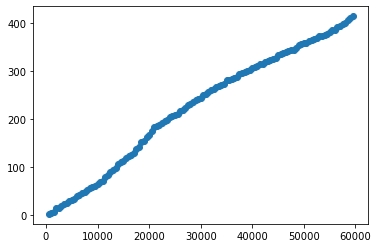

In [36]:
len_score = []

for i in range(500,60000,500):

    rs = supseq[:i]
    
    score = calculate_element_score3(match_award, mismatch_penalty, gap_penalty, 'ATGC', rs)
    
    len_score.append((len(rs), score))
    
    print('iter %d' % (i/500))
    
a = np.array(len_score)
plt.scatter(a[:,0],a[:,1])

In [40]:
d1 = pd.read_csv('resultp window 5 upto 388.csv')
d12 = pd.read_csv('resultn window 5 upto 388.csv')

In [39]:
d2 = pd.read_csv('resultp window 5 upto 512.csv')
d22 = pd.read_csv('resultn window 5 upto 512.csv')

d3 = pd.read_csv('win5 pool.csv')
d4 = pd.read_csv('resultp window 5 last som.csv')
d42 = pd.read_csv('resultn window 5 last som.csv')

In [41]:
d1 = pd.concat([d1,d12], axis = 0).reset_index(drop = True)
d2 = pd.concat([d2,d22], axis = 0).reset_index(drop = True)
d4 = pd.concat([d4,d42], axis = 0).reset_index(drop = True)

In [42]:
d1 = d1.dropna(axis = 1, how='any')
d2 = d2.dropna(axis = 1, how='any')
d3 = d3.dropna(axis = 1, how='any')
d4 = d4.dropna(axis = 1, how='any')

In [43]:
d = pd.concat([d1,d2,d3,d4], axis = 1).reset_index(drop = True)

In [49]:
d = d.loc[:,~d.columns.duplicated()]

In [51]:
d.to_csv('win5.csv', index = False)

In [52]:
d = pd.read_csv('win5.csv')

In [54]:
d2 = pd.read_csv('res 340.csv')

In [57]:
pndf = pd.read_csv('pndf.csv')

In [62]:
d = d.div(pndf['Len'], axis = 0)

In [67]:
d.to_csv('win5 len scaled.csv', index = False)